In [189]:
%load_ext autoreload
# %load_ext jupyternotify
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
from compas_surrogate.cosmic_integration.universe import (
    Universe, plot_event_matrix_on_universe_detection_matrix,
)
from compas_surrogate.liklelihood.likelihood import ln_likelihood

from glob import glob
import numpy as np





The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ImportError: cannot import name 'ln_likelihood' from 'compas_surrogate.liklelihood.likelihood' (/Users/avaj0001/Documents/projects/compas_dev/compas_ml_surrogate/compas_surrogate/liklelihood/likelihood.py)

94.0


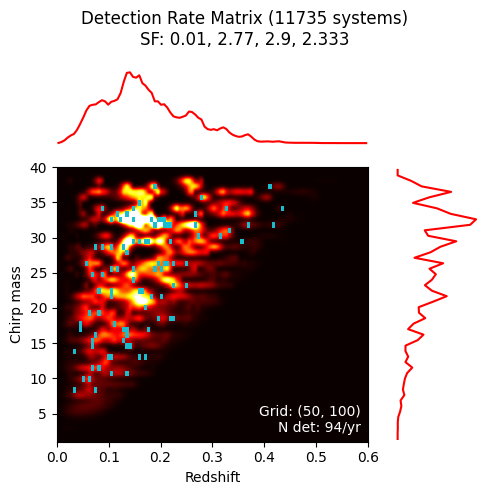

In [156]:
# load a set of universesv and choose 1 "ture" universe
universe_fns = glob("out_universe/*.npz")
universes = [Universe.from_npz(fn) for fn in universe_fns]
observed_uni = universes[5]
true_events, true_mcz = observed_uni.sample_possible_event_matrix()
fig = plot_event_matrix_on_universe_detection_matrix(observed_uni, true_rate2d=true_events)


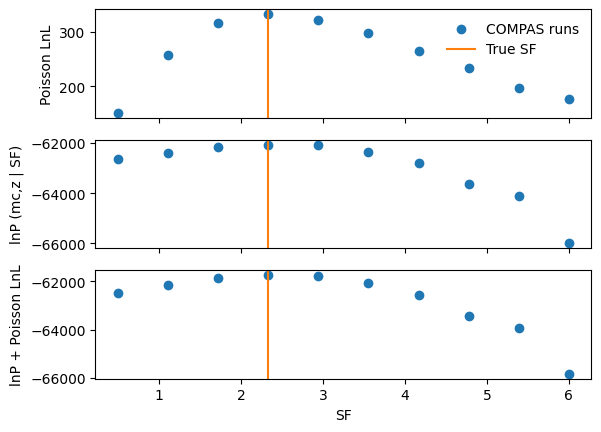

In [187]:
# plot just the grid lnl




p_lnl = np.array([ln_poisson_likelihood(np.sum(true_events), uni.n_detections(1)) for uni in universes])
grid_lnl = np.array([ln_mcz_grid_likelihood(true_mcz, uni.prob_of_mcz) for uni in universes])
sf_params = [uni.SF[3] for uni in universes]

fig, ax = plt.subplots(3, 1, sharex=True)

ax[0].scatter(sf_params, p_lnl, label="COMPAS runs")
ax[0].axvline(observed_uni.SF[3], c="C1", label="True SF")
ax[0].legend(frameon=False)
ax[0].set_ylabel("Poisson LnL")
ax[1].scatter(sf_params, grid_lnl)
ax[1].axvline(observed_uni.SF[3], c="C1")
ax[1].set_ylabel("lnP (mc,z | SF)")
ax[2].scatter(sf_params, grid_lnl + p_lnl)
ax[2].axvline(observed_uni.SF[3], c="C1")
ax[2].set_ylabel("lnP + Poisson LnL")
ax[2].set_xlabel("SF")
plt.show()






